# Similarities and Differences of Top vs. Bottom 20% (Pt.2 - Results, Strategies, Distributions)

In [7]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
import os

month_file = '3_July'

# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)



## Load Dataframes

In [8]:
# Read in data
df_bottom_20 = pd.read_parquet("Bottom_20_gambles.parquet")
df_top_20 = pd.read_parquet("Top_20_gambles.parquet")
print('--------------------------------------------------')

# Eliminate players who maximum number of gambles is 1
df_bottom_20 = df_bottom_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)
df_top_20 = df_top_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)

--------------------------------------------------


## Define Categoriacal Variables

### Part 1
It is time to see which palyers changed machines to either increas or decrease their minimum bets.  

* Define function to look for our desire chage.
* We are going to be using _slotdenomination_, _assetnumber_, _maxbe_, _theoreticalpaybackpercent_ to observe the change
* Create a variable _change_ that is 1 everytime any of the above varibales changes (either increases or decreases) 0 otherwise for each player.

In [9]:
from ipynb.fs.full.functions import count_increase, count_decrease, count_change_slot

In [10]:
players_increase_slot_t20 = count_increase(df_top_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_t20 = count_decrease(df_top_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_change_machine_t20 = count_change_slot(df_top_20, "change_machine", "playerkey", "assetnumber")
players_increase_maxbet_t20 = count_increase(df_top_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_t20 = count_decrease(df_top_20, "decrease_maxbet", "playerkey", "maxbet")
players_increase_payback_t20 = count_increase(df_top_20, "increase_payback", "playerkey", "theoreticalpaybackpercent")
players_decrease_payback_t20 = count_decrease(df_top_20, "decrease_payback", "playerkey", "theoreticalpaybackpercent")

Count of players who increase_slotdeno : 2266
Player who changes the most: 6255
------------------------------------------------------------------------------------------------------------------
Count of players who decrease_slotdeno : 2294
Player who changes the most: 6255
------------------------------------------------------------------------------------------------------------------
Count of players who change_machine : 2839
Player who changes the most: 6255
------------------------------------------------------------------------------------------------------------------
Count of players who increase_maxbet : 2510
Player who changes the most: 6255
------------------------------------------------------------------------------------------------------------------
Count of players who decrease_maxbet : 2496
Player who changes the most: 6255
------------------------------------------------------------------------------------------------------------------
Count of players who increase_pa

In [11]:
players_increase_slot = count_increase(df_bottom_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot = count_decrease(df_bottom_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_change_machine = count_change_slot(df_bottom_20, "change_machine", "playerkey", "assetnumber")
players_increase_maxbet = count_increase(df_bottom_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet = count_decrease(df_bottom_20, "decrease_maxbet", "playerkey", "maxbet")
players_increase_payback = count_increase(df_bottom_20, "increase_payback", "playerkey", "theoreticalpaybackpercent")
players_decrease_payback = count_decrease(df_bottom_20, "decrease_payback", "playerkey", "theoreticalpaybackpercent")

Count of players who increase_slotdeno : 250
Player who changes the most: 10784
------------------------------------------------------------------------------------------------------------------
Count of players who decrease_slotdeno : 254
Player who changes the most: 10784
------------------------------------------------------------------------------------------------------------------
Count of players who change_machine : 805
Player who changes the most: 7932
------------------------------------------------------------------------------------------------------------------
Count of players who increase_maxbet : 374
Player who changes the most: 7932
------------------------------------------------------------------------------------------------------------------
Count of players who decrease_maxbet : 362
Player who changes the most: 7932
------------------------------------------------------------------------------------------------------------------
Count of players who increase_payba

### Part 2

In this section we are analazying the change of slot denominantion and maxbet when the previous returns were either positive or negative.

In [12]:
# Create a new column 'magnitude' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_bottom_20['result_type'] = df_bottom_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create a categorical column "denom_type" that is 'increase' if column 'increase_slotdeno' is 1, and 'decrease' if column 'decrease_slotdeno' is 1, and no change if both columns are 0
df_bottom_20['denom_type'] = df_bottom_20.apply(lambda x: 'higher' if x['increase_slotdeno'] == 1 else 'lower' if x['decrease_slotdeno'] == 1 else 'no change', axis=1)

# Create a categorical column "maxbet_type" that is 'increase' if column 'increase_maxbet' is 1, and 'decrease' if column 'decrease_maxbet' is 1, and no change if both columns are 0
df_bottom_20['maxbet_type'] = df_bottom_20.apply(lambda x: 'increase' if x['increase_maxbet'] == 1 else 'decrease' if x['decrease_maxbet'] == 1 else 'no change', axis=1)

# Create categorical column "payback_type" that is 'increase' if column 'increase_payback' is 1, and 'decrease' if column 'decrease_payback' is 1, and no change if both columns are 0
df_bottom_20['payback_type'] = df_bottom_20.apply(lambda x: 'higher' if x['increase_payback'] == 1 else 'lower' if x['decrease_payback'] == 1 else 'no change', axis=1)

# Create categorical column "machine_type" that is 'change' if column 'change_machine' is 1, and 'no change' if column 'change_machine' is 0
df_bottom_20['machine_type'] = df_bottom_20.apply(lambda x: 'change' if x['change_machine'] == 1 else 'no change', axis=1)


In [13]:
# Create a new column 'magnitude' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_top_20['result_type'] = df_top_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create a categorical column "denom_type" that is 'increase' if column 'increase_slotdeno' is 1, and 'decrease' if column 'decrease_slotdeno' is 1, and no change if both columns are 0
df_top_20['denom_type'] = df_top_20.apply(lambda x: 'higher' if x['increase_slotdeno'] == 1 else 'lower' if x['decrease_slotdeno'] == 1 else 'no change', axis=1)

# Create a categorical column "maxbet_type" that is 'increase' if column 'increase_maxbet' is 1, and 'decrease' if column 'decrease_maxbet' is 1, and no change if both columns are 0
df_top_20['maxbet_type'] = df_top_20.apply(lambda x: 'increase' if x['increase_maxbet'] == 1 else 'decrease' if x['decrease_maxbet'] == 1 else 'no change', axis=1)

# Create categorical column "payback_type" that is 'increase' if column 'increase_payback' is 1, and 'decrease' if column 'decrease_payback' is 1, and no change if both columns are 0
df_top_20['payback_type'] = df_top_20.apply(lambda x: 'higher' if x['increase_payback'] == 1 else 'lower' if x['decrease_payback'] == 1 else 'no change', axis=1)

# Create categorical column "machine_type" that is 'change' if column 'change_machine' is 1, and 'no change' if column 'change_machine' is 0
df_top_20['machine_type'] = df_top_20.apply(lambda x: 'change' if x['change_machine'] == 1 else 'no change', axis=1)


### Part 3
Create categorical variables for visits and sessions_time
* _v1_: would stand for visit 1 and so on.
* _s1_: would stand for session 1 and so on. 

In [14]:
# Create categorical column named "visit_c" that is all the values of "visit" column plus a 'v' in front of it
df_bottom_20['visit_c'] = 'v' + df_bottom_20['visit'].astype(str)
df_top_20['visit_c'] = 'v' + df_top_20['visit'].astype(str)

# Create a categorical column named "session_c" that is all the values of "session" column plus a 's' in front of it
df_bottom_20['session_c'] = 's' + df_bottom_20['session_time'].astype(str)
df_top_20['session_c'] = 's' + df_top_20['session_time'].astype(str)

## Visualization 
### Count Plots
#### Top 20

##### Ls, NHs, Ws, Ds 

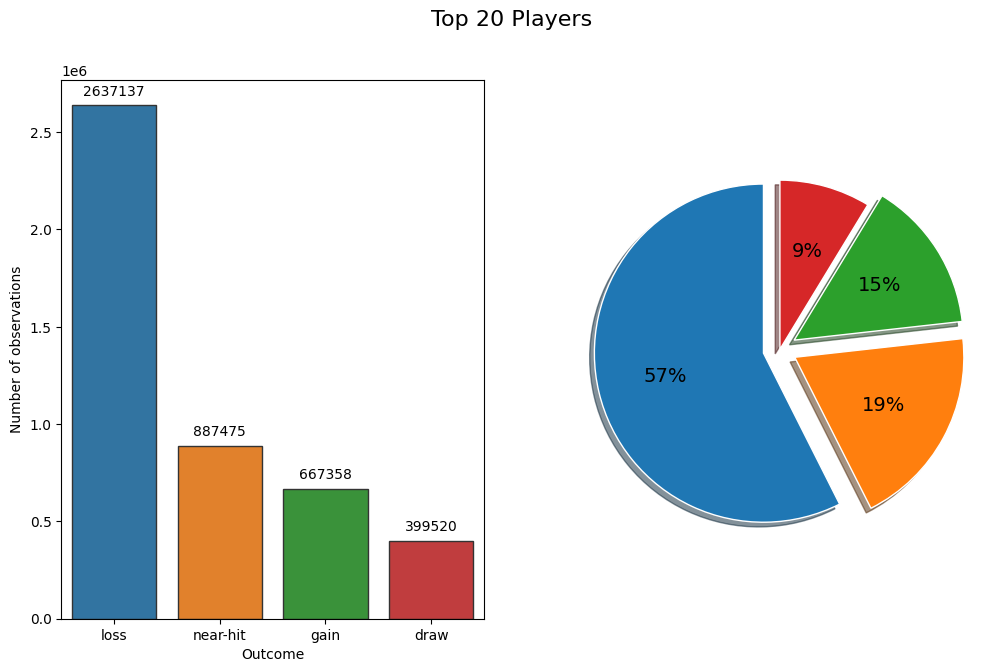

In [15]:

# Create figure 1  barplot of the number of losses, near-hits, gains, and draws
fig1, axes1 = plt.subplots(1, 2)
sns.countplot(x='result_type', data=df_top_20, order=['loss', 'near-hit', 'gain', 'draw'], edgecolor=".2", ax=axes1[0])
axes1[0].set(xlabel='Outcome', ylabel='Number of observations')
# Display values on center top of each bar
for p in axes1[0].patches:
    axes1[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Create pie chart of the number of losses, gains, and draws, add it to axes1[1]
axes1[1].pie(df_top_20['result_type'].value_counts(), labels=None, autopct='%.0f%%', startangle=90, textprops={'fontsize': 14}, explode=(0.1, 0.1, 0.1, 0), shadow=True, wedgeprops={'linewidth': 1, 'edgecolor': 'white', 'antialiased': True})

# Set figure title
fig1.suptitle('Top 20 Players', fontsize=16)

# Make figure 1 bigger
fig1.set_size_inches(12, 7)

###### Per Visit Analysis

{'v1': 2898, 'v2': 2338, 'v3': 1382, 'v4': 607, 'v5': 256, 'v6': 117, 'v7': 65, 'v8': 36, 'v9': 25, 'v10': 15, 'v11': 12, 'v12': 9, 'v13': 8, 'v14': 6, 'v15': 5, 'v16': 3, 'v17': 2, 'v18': 2, 'v19': 2, 'v20': 1, 'v21': 1, 'v22': 1, 'v23': 1, 'v24': 1, 'v25': 1}


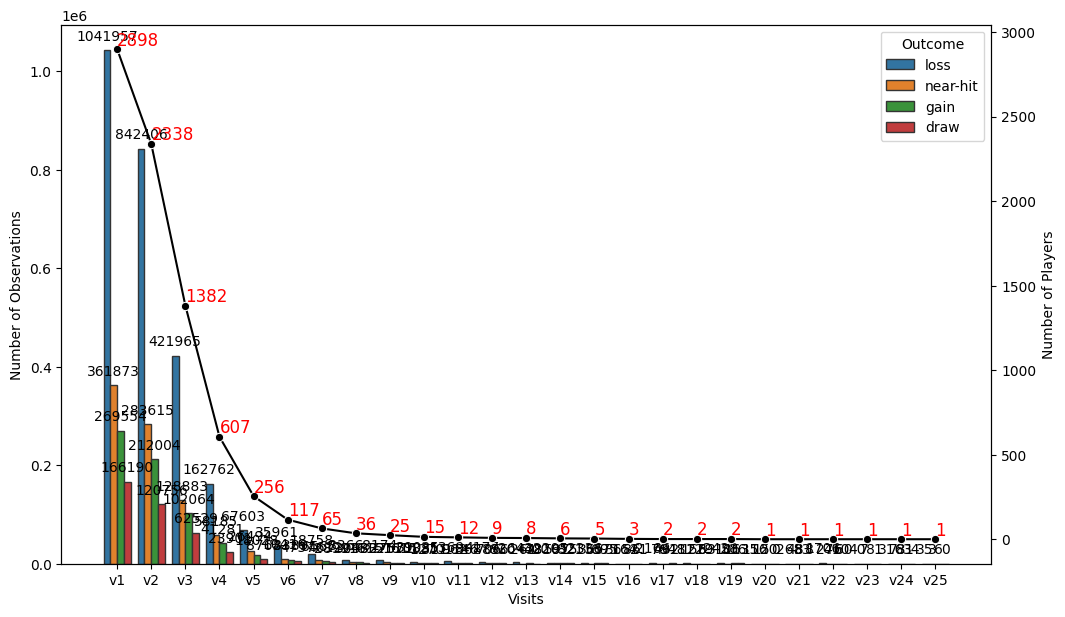

In [16]:
# Create a list of unique 'timing' values
timing = df_top_20['visit_c'].unique()

# Count the number of players per leg
count_v_top = {}
for i in timing:
    leg = df_top_20[df_top_20['visit_c'] == i]
    leg = leg['playerkey'].unique()
    leg = len(leg)
    count_v_top[i] = leg

print(count_v_top)

# Create figure 3 
fig3, axes3 = plt.subplots(1, 1)
sns.countplot(x='visit_c', data=df_top_20, hue='result_type', hue_order=['loss', 'near-hit', 'gain', 'draw'], edgecolor=".2", ax=axes3)
# Create second y-axis
axes3_2 = axes3.twinx()

# Create a line plot with the count dictionary
sns.lineplot(x=list(count_v_top.keys()), y=list(count_v_top.values()), marker='o', ax=axes3_2, color='black')
# Add the number of observations per leg as a text to the plot 
for i in range(len(count_v_top)):
    axes3_2.text(i, list(count_v_top.values())[i], list(count_v_top.values())[i], ha='left', va='bottom', fontsize=12, color='red')

# Display whole values (no decimals) on center top of bars
for p in axes3.patches:
    axes3.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# Set the y-axis labels
axes3.set_ylabel('Number of Observations')
axes3_2.set_ylabel('Number of Players')

# Set the x-axis labels
axes3.set_xlabel('Visits')
# Set legnd titles
axes3.legend_.set_title('Outcome')
# Make figure bigger   ;
fig3.set_size_inches(12, 7)
# Make figure more opaque
fig3.set_alpha(0.8)

###### Per Session Analysis

{'s1': 2898, 's2': 2195, 's3': 1294, 's4': 638, 's5': 280, 's6': 110, 's7': 41, 's8': 13, 's9': 4, 's10': 1}


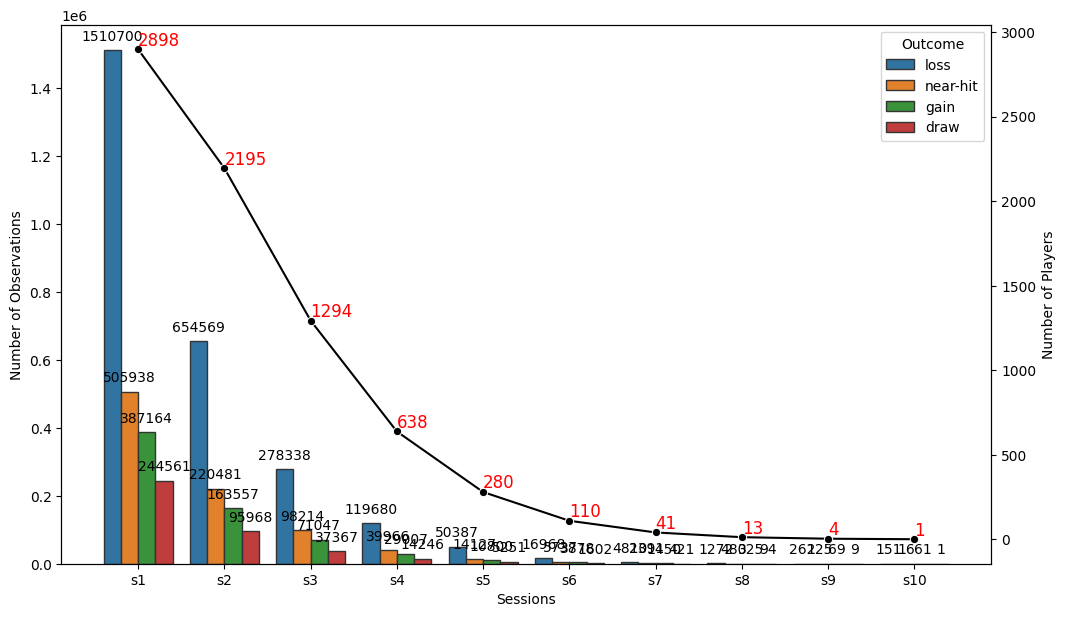

In [17]:
# Create a list of unique 'timing' values
timing = df_top_20['session_c'].unique()

# Count the number of players per leg
count_s_top = {}
for i in timing:
    leg = df_top_20[df_top_20['session_c'] == i]
    leg = leg['playerkey'].unique()
    leg = len(leg)
    count_s_top[i] = leg

print(count_s_top)

# Create figure 3 (ups)
fig3, axes3 = plt.subplots(1, 1)
sns.countplot(x='session_c', data=df_top_20, hue='result_type', hue_order=['loss', 'near-hit', 'gain', 'draw'], edgecolor=".2", ax=axes3)
# Create second y-axis
axes3_2 = axes3.twinx()

# Create a line plot with the count dictionary
sns.lineplot(x=list(count_s_top.keys()), y=list(count_s_top.values()), marker='o', ax=axes3_2, color='black')
# Add the number of observations per leg as a text to the plot 
for i in range(len(count_s_top)):
    axes3_2.text(i, list(count_s_top.values())[i], list(count_s_top.values())[i], ha='left', va='bottom', fontsize=12, color='red')

# Display whole values (no decimals) on center top of bars
for p in axes3.patches:
    axes3.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
# Set the y-axis labels
axes3.set_ylabel('Number of Observations')
axes3_2.set_ylabel('Number of Players')

# Set the x-axis labels
axes3.set_xlabel('Sessions')
# Set legnd titles
axes3.legend_.set_title('Outcome')
# Make figure bigger   ;
fig3.set_size_inches(12, 7)
# Make figure more opaque
fig3.set_alpha(0.8)

##### Deno, Maxbet, Payback & Machine

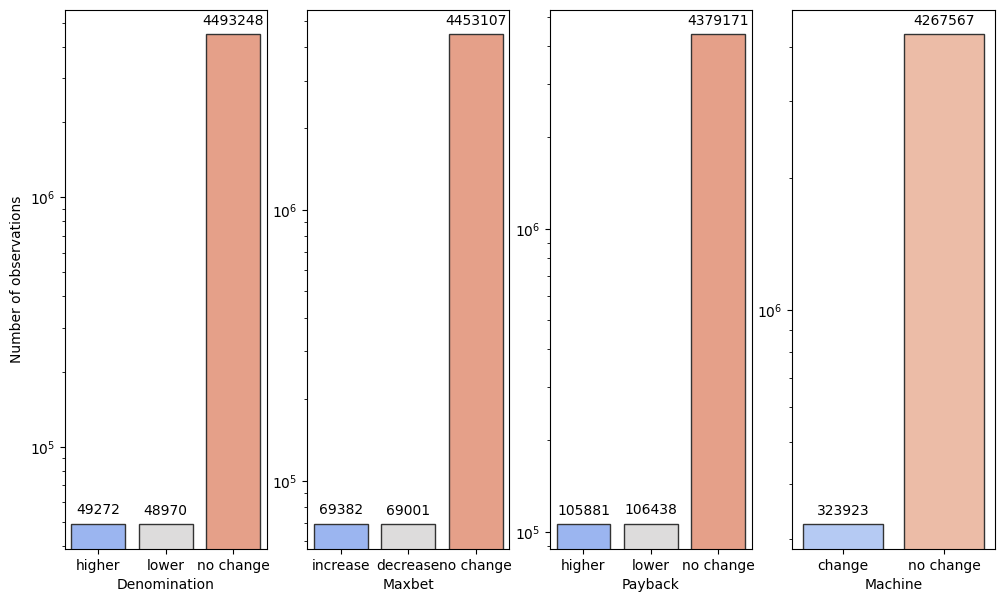

In [18]:
# Create figure 4 that is the same as figure 1 but with the denom_type column
fig4, axes4 = plt.subplots(1, 4)
sns.countplot(x='denom_type', data=df_top_20, order=['higher', 'lower', 'no change'], edgecolor=".2", ax=axes4[0], palette='coolwarm')
# Scale the y-axis to the number of observations
axes4[0].set(yscale="log")
axes4[0].set(xlabel='Denomination', ylabel='Number of observations')

# Create a count plot with the maxbet_type column
sns.countplot(x='maxbet_type', data=df_top_20, order=['increase', 'decrease', 'no change'], edgecolor=".2", ax=axes4[1], palette='coolwarm')
# Scale the y-axis to the number of observations
axes4[1].set(yscale="log")
axes4[1].set(xlabel='Maxbet', ylabel=None)

# Create a count plot with the payback_type column
sns.countplot(x='payback_type', data=df_top_20, order=['higher', 'lower', 'no change'], edgecolor=".2", ax=axes4[2], palette='coolwarm')
# Scale the y-axis to the number of observations
axes4[2].set(yscale="log")
axes4[2].set(xlabel='Payback', ylabel=None)

# create a countplot with the machine_type column
sns.countplot(x='machine_type', data=df_top_20, order=['change', 'no change'], edgecolor=".2", ax=axes4[3], palette='coolwarm')
# Scale the y-axis to the number of observations
axes4[3].set(yscale="log")
axes4[3].set(xlabel='Machine', ylabel=None)

# Display values on center top of all bars
for ax in axes4:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
# Make figure 4 bigger
fig4.set_size_inches(12, 7)

###### Per Visit

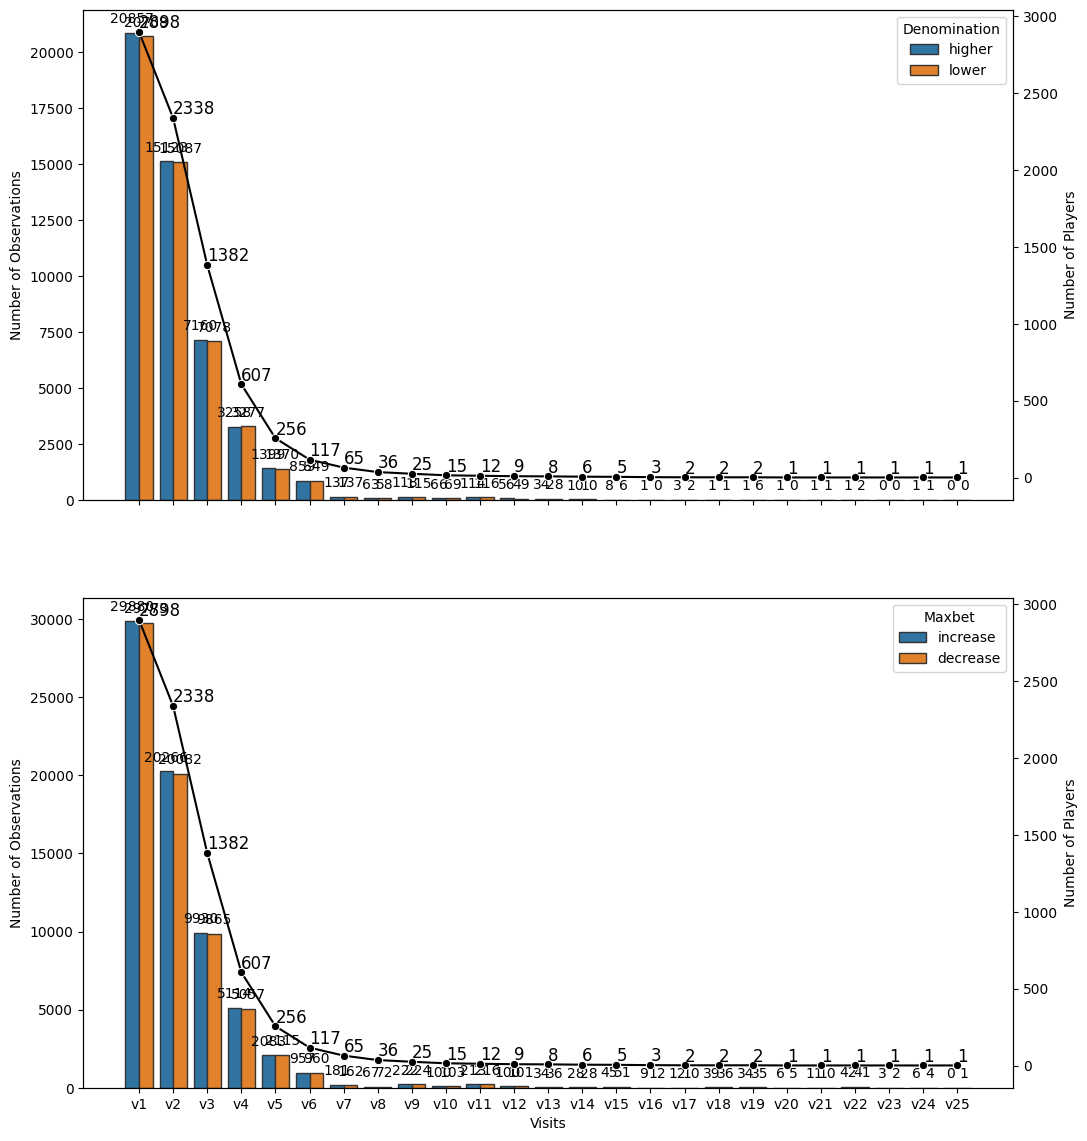

In [19]:
# Create figure 5
fig5, axes5 = plt.subplots(2, 1, sharex=True)
sns.countplot(x='visit_c', data=df_top_20, hue='denom_type', hue_order=['higher', 'lower'], edgecolor=".2", ax=axes5[0])
# Create second y-axis
axes5_2 = axes5[0].twinx()

# Create a line plot with the count dictionary
sns.lineplot(x=list(count_v_top.keys()), y=list(count_v_top.values()), marker='o', ax=axes5_2, color='black')
# Add the number of observations per leg as a text to the plot 
for i in range(len(count_v_top)):
    axes5_2.text(i, list(count_v_top.values())[i], list(count_v_top.values())[i], ha='left', va='bottom', fontsize=12)

# Display whole values (no decimals) on center top of bars
for p in axes5[0].patches:
    axes5[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# Set the y-axis labels
axes5[0].set_ylabel('Number of Observations')
axes5_2.set_ylabel('Number of Players')
axes5[0].set_xlabel(None)

# Set legnd titles
axes5[0].legend_.set_title('Denomination')

sns.countplot(x='visit_c', data=df_top_20, hue='maxbet_type', hue_order=['increase', 'decrease'], edgecolor=".2", ax=axes5[1])
# Create second y-axis
axes5_3 = axes5[1].twinx()
# Set the x-axis labels
axes5[1].set_xlabel('Visits')


# Create a line plot with the count dictionary
sns.lineplot(x=list(count_v_top.keys()), y=list(count_v_top.values()), marker='o', ax=axes5_3, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_v_top)):
    axes5_3.text(i, list(count_v_top.values())[i], list(count_v_top.values())[i], ha='left', va='bottom', fontsize=12)

# Display whole values (no decimals) on center top of bars
for p in axes5[1].patches:
    axes5[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes5[1].set_ylabel('Number of Observations')
axes5_3.set_ylabel('Number of Players')

# Set legnd titles
axes5[1].legend_.set_title('Maxbet')

# Make figure bigger   ;
fig5.set_size_inches(12, 14)
# Make figure more opaque
fig5.set_alpha(0.8)

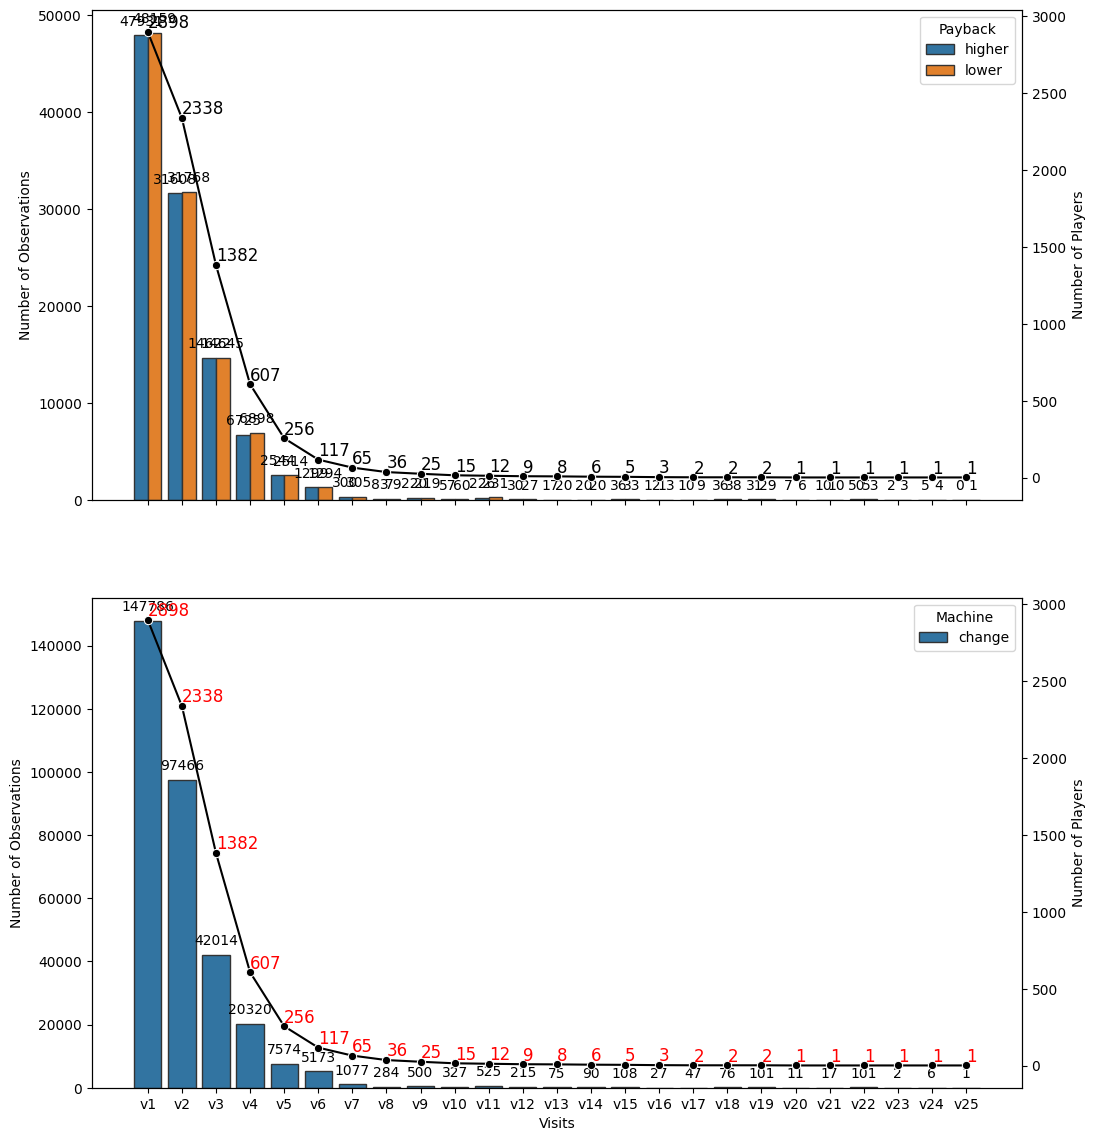

In [20]:
# Lets do the same as the step above but with the payback_type and machine_type columns
fig6, axes6 = plt.subplots(2, 1, sharex=True)
sns.countplot(x='visit_c', data=df_top_20, hue='payback_type', hue_order=['higher', 'lower'], edgecolor=".2", ax=axes6[0])
# Create second y-axis
axes6_2 = axes6[0].twinx()

# Create a line plot with the count dictionary
sns.lineplot(x=list(count_v_top.keys()), y=list(count_v_top.values()), marker='o', ax=axes6_2, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_v_top)):
    axes6_2.text(i, list(count_v_top.values())[i], list(count_v_top.values())[i], ha='left', va='bottom', fontsize=12)

# Display whole values (no decimals) on center top of bars
for p in axes6[0].patches:
    axes6[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes6[0].set_ylabel('Number of Observations')
axes6_2.set_ylabel('Number of Players')
axes6[0].set_xlabel(None)

# Set legnd titles
axes6[0].legend_.set_title('Payback')

sns.countplot(x='visit_c', data=df_top_20, hue='machine_type', hue_order=['change'], edgecolor=".2", ax=axes6[1])
# Create second y-axis
axes6_3 = axes6[1].twinx()
# Set the x-axis labels
axes6[1].set_xlabel('Visits')


# Create a line plot with the count dictionary
sns.lineplot(x=list(count_v_top.keys()), y=list(count_v_top.values()), marker='o', ax=axes6_3, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_v_top)):
    axes6_3.text(i, list(count_v_top.values())[i], list(count_v_top.values())[i], ha='left', va='bottom', fontsize=12, color='red')

# Display whole values (no decimals) on center top of bars
for p in axes6[1].patches:
    axes6[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes6[1].set_ylabel('Number of Observations')
axes6_3.set_ylabel('Number of Players')

# Set legnd titles
axes6[1].legend_.set_title('Machine')

# Make figure bigger
fig6.set_size_inches(12, 14)
# Make figure more opaque
fig6.set_alpha(0.8)

###### Per Session

{'s1': 2898, 's2': 2195, 's3': 1294, 's4': 638, 's5': 280, 's6': 110, 's7': 41, 's8': 13, 's9': 4, 's10': 1}


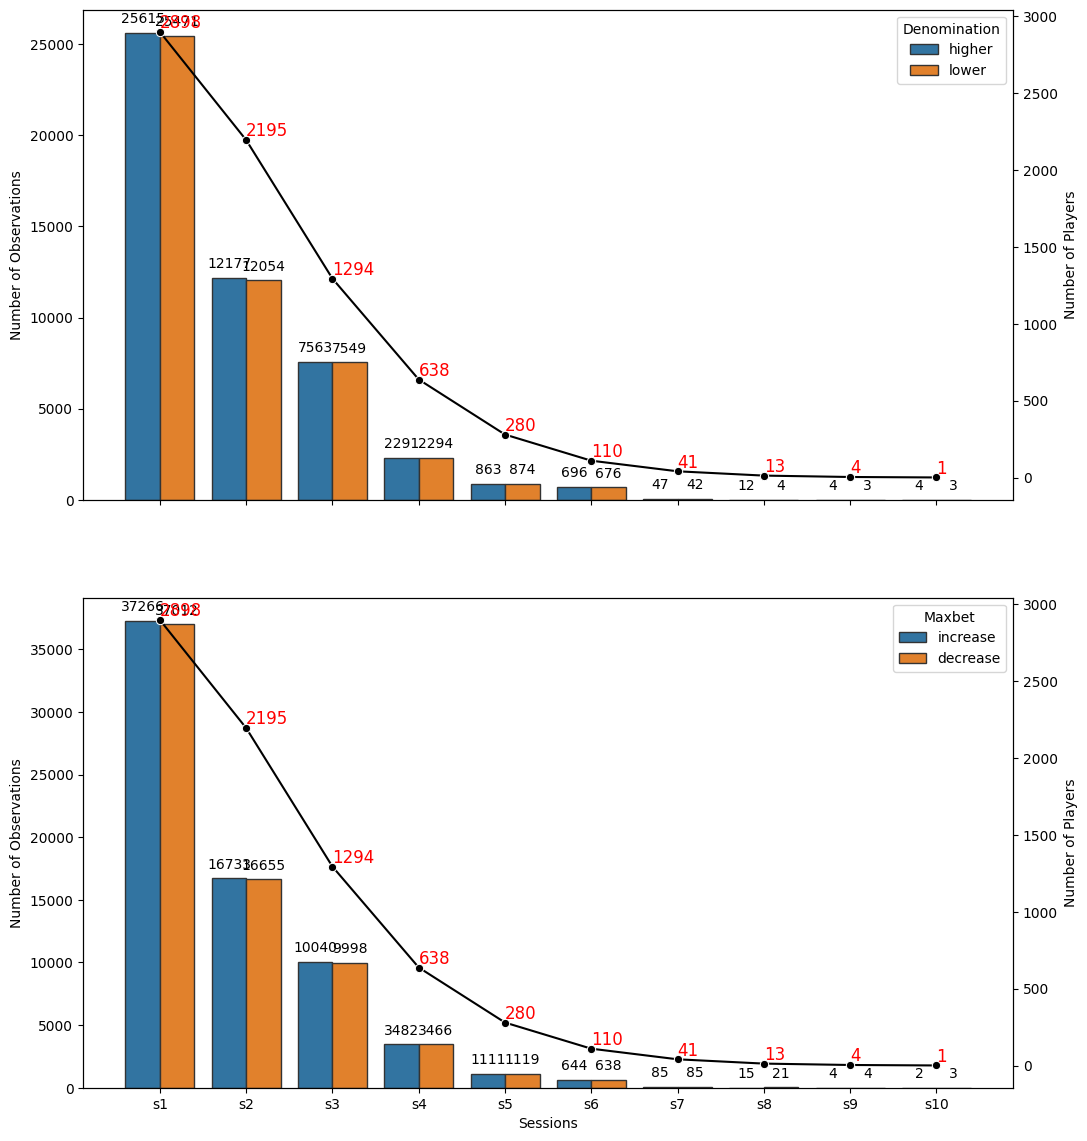

In [21]:
# Create a list of unique 'timing' values
timing = df_top_20['session_c'].unique()

# Count the number of players per leg
count_s_top = {}
for i in timing:
    leg = df_top_20[df_top_20['session_c'] == i]
    leg = leg['playerkey'].unique()
    leg = len(leg)
    count_s_top[i] = leg

print(count_s_top)

# Let's create the same figure as figure 5 but with 'session_c' instead of 'visit_c'
fig7, axes7 = plt.subplots(2, 1, sharex=True)
sns.countplot(x='session_c', data=df_top_20, hue='denom_type', hue_order=['higher', 'lower'], edgecolor=".2", ax=axes7[0])
# Create second y-axis
axes7_2 = axes7[0].twinx()

# Create a line plot with the count dictionary
sns.lineplot(x=list(count_s_top.keys()), y=list(count_s_top.values()), marker='o', ax=axes7_2, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_s_top)):
    axes7_2.text(i, list(count_s_top.values())[i], list(count_s_top.values())[i], ha='left', va='bottom', fontsize=12, color='red')

# Display whole values (no decimals) on center top of bars
for p in axes7[0].patches:
    axes7[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes7[0].set_ylabel('Number of Observations')
axes7_2.set_ylabel('Number of Players')
axes7[0].set_xlabel(None)

# Set legnd titles
axes7[0].legend_.set_title('Denomination')

sns.countplot(x='session_c', data=df_top_20, hue='maxbet_type', hue_order=['increase', 'decrease'], edgecolor=".2", ax=axes7[1])
# Create second y-axis
axes7_3 = axes7[1].twinx()
# Set the x-axis labels
axes7[1].set_xlabel('Sessions')


# Create a line plot with the count dictionary
sns.lineplot(x=list(count_s_top.keys()), y=list(count_s_top.values()), marker='o', ax=axes7_3, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_s_top)):
    axes7_3.text(i, list(count_s_top.values())[i], list(count_s_top.values())[i], ha='left', va='bottom', fontsize=12, color='red')

# Display whole values (no decimals) on center top of bars
for p in axes7[1].patches:
    axes7[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes7[1].set_ylabel('Number of Observations')
axes7_3.set_ylabel('Number of Players')

# Set legnd titles
axes7[1].legend_.set_title('Maxbet')

# Make figure bigger
fig7.set_size_inches(12, 14)
# Make figure more opaque
fig7.set_alpha(0.8)

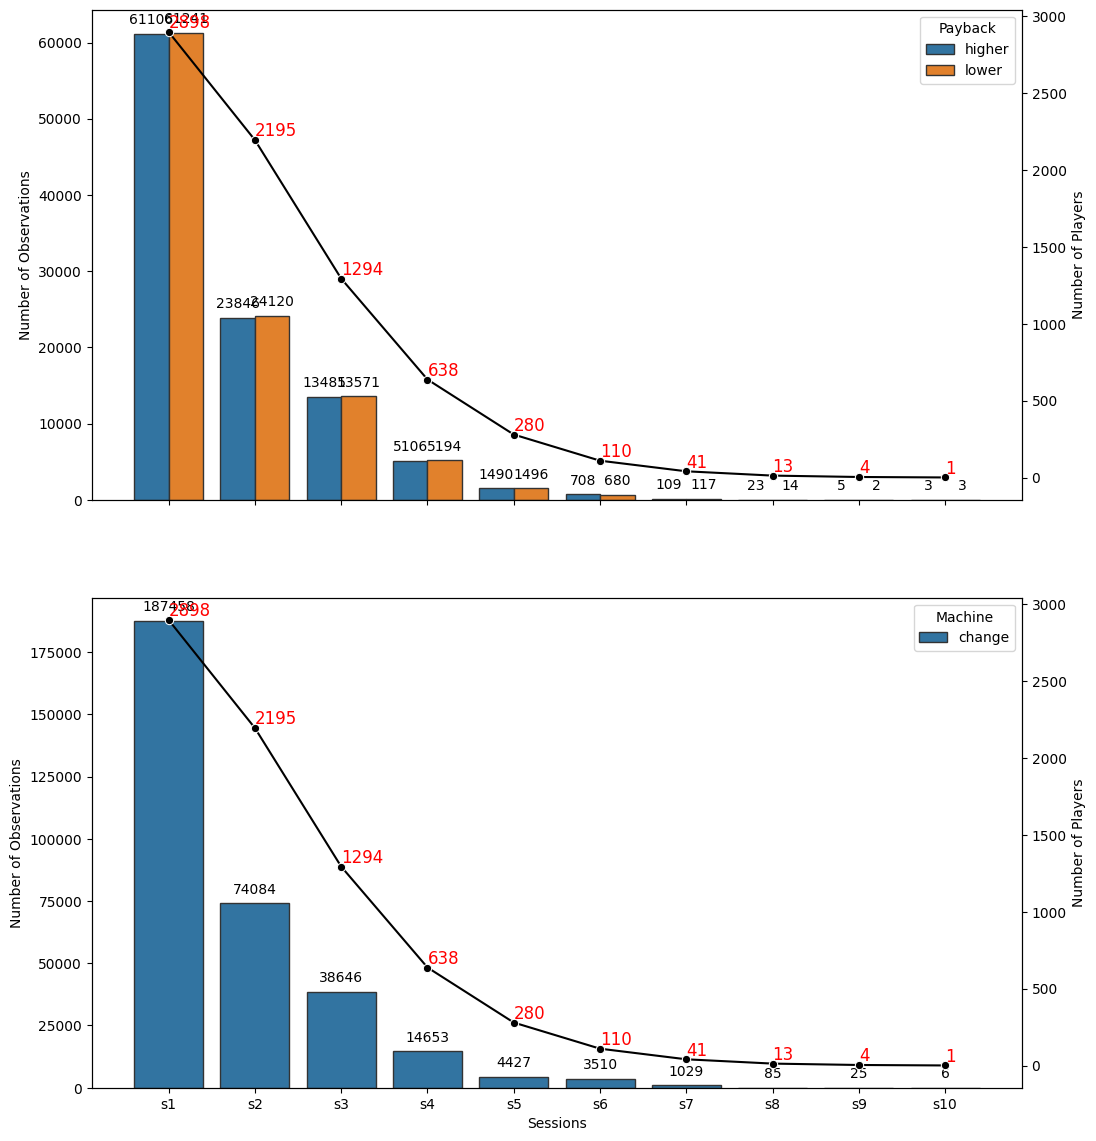

In [22]:
# Let's create the same figure as figure 6 but with 'session_c' instead of 'visit_c'
fig8, axes8 = plt.subplots(2, 1, sharex=True)
sns.countplot(x='session_c', data=df_top_20, hue='payback_type', hue_order=['higher', 'lower'], edgecolor=".2", ax=axes8[0])
# Create second y-axis
axes8_2 = axes8[0].twinx()

# Create a line plot with the count dictionary
sns.lineplot(x=list(count_s_top.keys()), y=list(count_s_top.values()), marker='o', ax=axes8_2, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_s_top)):
    axes8_2.text(i, list(count_s_top.values())[i], list(count_s_top.values())[i], ha='left', va='bottom', fontsize=12, color='red')

# Display whole values (no decimals) on center top of bars
for p in axes8[0].patches:
    axes8[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes8[0].set_ylabel('Number of Observations')
axes8_2.set_ylabel('Number of Players')
axes8[0].set_xlabel(None)

# Set legnd titles
axes8[0].legend_.set_title('Payback')

sns.countplot(x='session_c', data=df_top_20, hue='machine_type', hue_order=['change'], edgecolor=".2", ax=axes8[1])
# Create second y-axis
axes8_3 = axes8[1].twinx()
# Set the x-axis labels
axes8[1].set_xlabel('Sessions')


# Create a line plot with the count dictionary
sns.lineplot(x=list(count_s_top.keys()), y=list(count_s_top.values()), marker='o', ax=axes8_3, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_s_top)):
    axes8_3.text(i, list(count_s_top.values())[i], list(count_s_top.values())[i], ha='left', va='bottom', fontsize=12, color='red')

# Display whole values (no decimals) on center top of bars
for p in axes8[1].patches:
    axes8[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes8[1].set_ylabel('Number of Observations')
axes8_3.set_ylabel('Number of Players')

# Set legnd titles
axes8[1].legend_.set_title('Machine')

# Make figure bigger
fig8.set_size_inches(12, 14)
# Make figure more opaque
fig8.set_alpha(0.8)

### Bottom 20

#### Ls, NHs, Ws, Ds

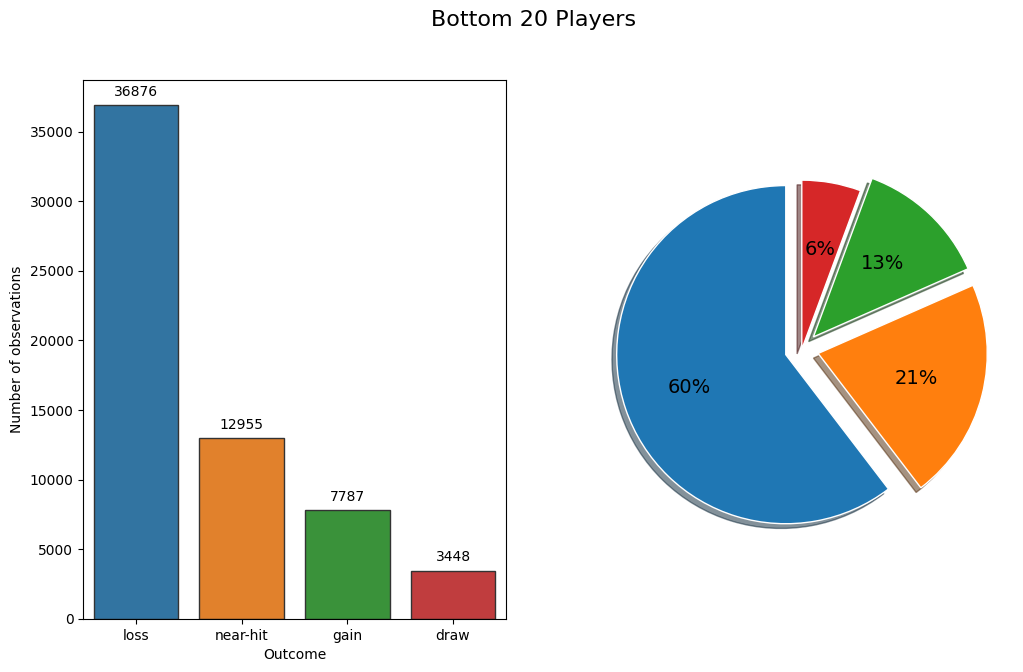

In [23]:
# Create figure 2  barplot of the number of losses, near-hits, gains, and draws
fig9, axes9 = plt.subplots(1, 2)
sns.countplot(x='result_type', data=df_bottom_20, order=['loss', 'near-hit', 'gain', 'draw'], edgecolor=".2", ax=axes9[0])
axes9[0].set(xlabel='Outcome', ylabel='Number of observations')
# Display values on center top of each bar
for p in axes9[0].patches:
    axes9[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Create pie chart of the number of losses, gains, and draws, add it to axes3[1]
axes9[1].pie(df_bottom_20['result_type'].value_counts(), labels=None, autopct='%.0f%%', startangle=90, textprops={'fontsize': 14}, explode=(0.1, 0.1, 0.1, 0), shadow=True, wedgeprops={'linewidth': 1, 'edgecolor': 'white', 'antialiased': True})

# Set figure title
fig9.suptitle('Bottom 20 Players', fontsize=16)

# Make figure 2 bigger
fig9.set_size_inches(12, 7)

##### Per Visit

{'v1': 2868, 'v2': 140, 'v3': 5}


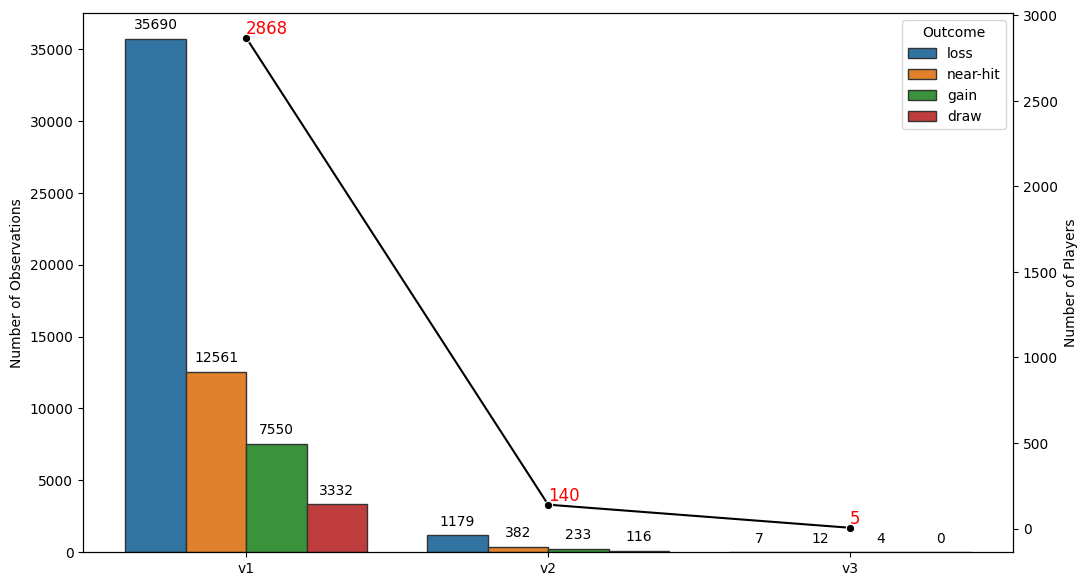

In [24]:
# Create a list of unique 'timing' values
timing = df_bottom_20['visit_c'].unique()

# Count the number of players per leg
count_v_bottom = {}
for i in timing:
    leg = df_bottom_20[df_bottom_20['visit_c'] == i]
    leg = leg['playerkey'].unique()
    leg = len(leg)
    count_v_bottom[i] = leg

print(count_v_bottom)

# Create figure 10 that is the same as fig3 but with df_bottom_20
fig10, axes10 = plt.subplots(1, 1)
sns.countplot(x='visit_c', data=df_bottom_20, hue='result_type', hue_order=['loss', 'near-hit', 'gain', 'draw'], edgecolor=".2", ax=axes10)
# Create second y-axis
axes10_2 = axes10.twinx()

# Create a line plot with the count dictionary
sns.lineplot(x=list(count_v_bottom.keys()), y=list(count_v_bottom.values()), marker='o', ax=axes10_2, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_v_bottom)):
    axes10_2.text(i, list(count_v_bottom.values())[i], list(count_v_bottom.values())[i], ha='left', va='bottom', fontsize=12, color='red')

# Display whole values (no decimals) on center top of bars
for p in axes10.patches:
    axes10.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes10.set_ylabel('Number of Observations')
axes10_2.set_ylabel('Number of Players')
axes10.set_xlabel(None)

# Set legnd titles
axes10.legend_.set_title('Outcome')

# Make figure bigger
fig10.set_size_inches(12, 7)
# Make figure more opaque
fig10.set_alpha(0.8)


##### Per Session

{'s1': 2868, 's2': 134, 's3': 4}


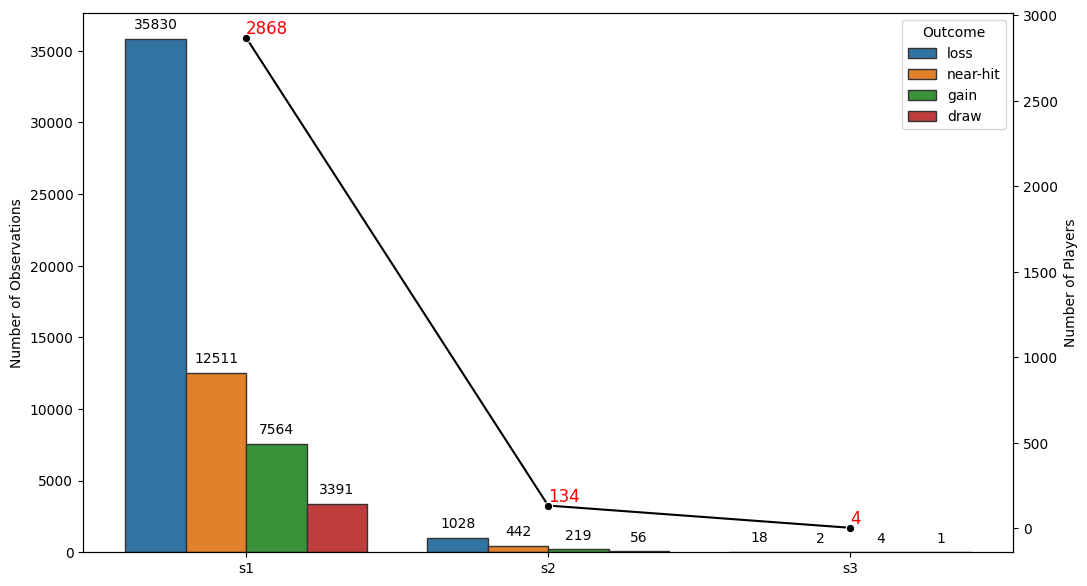

In [25]:
# Create a list of unique 'timing' values
timing = df_bottom_20['session_c'].unique()

# Count the number of players per leg
count_s_bottom = {}
for i in timing:
    leg = df_bottom_20[df_bottom_20['session_c'] == i]
    leg = leg['playerkey'].unique()
    leg = len(leg)
    count_s_bottom[i] = leg

print(count_s_bottom)

# Create figure 11 that is the same as fig10 but session_c instead of visit_c
fig11, axes11 = plt.subplots(1, 1)
sns.countplot(x='session_c', data=df_bottom_20, hue='result_type', hue_order=['loss', 'near-hit', 'gain', 'draw'], edgecolor=".2", ax=axes11)
# Create second y-axis
axes11_2 = axes11.twinx()

# Create a line plot with the count dictionary
sns.lineplot(x=list(count_s_bottom.keys()), y=list(count_s_bottom.values()), marker='o', ax=axes11_2, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_s_bottom)):
    axes11_2.text(i, list(count_s_bottom.values())[i], list(count_s_bottom.values())[i], ha='left', va='bottom', fontsize=12, color='red')

# Display whole values (no decimals) on center top of bars
for p in axes11.patches:
    axes11.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes11.set_ylabel('Number of Observations')
axes11_2.set_ylabel('Number of Players')
axes11.set_xlabel(None)

# Set legnd titles
axes11.legend_.set_title('Outcome')

# Make figure bigger
fig11.set_size_inches(12, 7)
# Make figure more opaque
fig11.set_alpha(0.8)

### Denom, Maxbet, Payback, & Machine

#### Per Visit

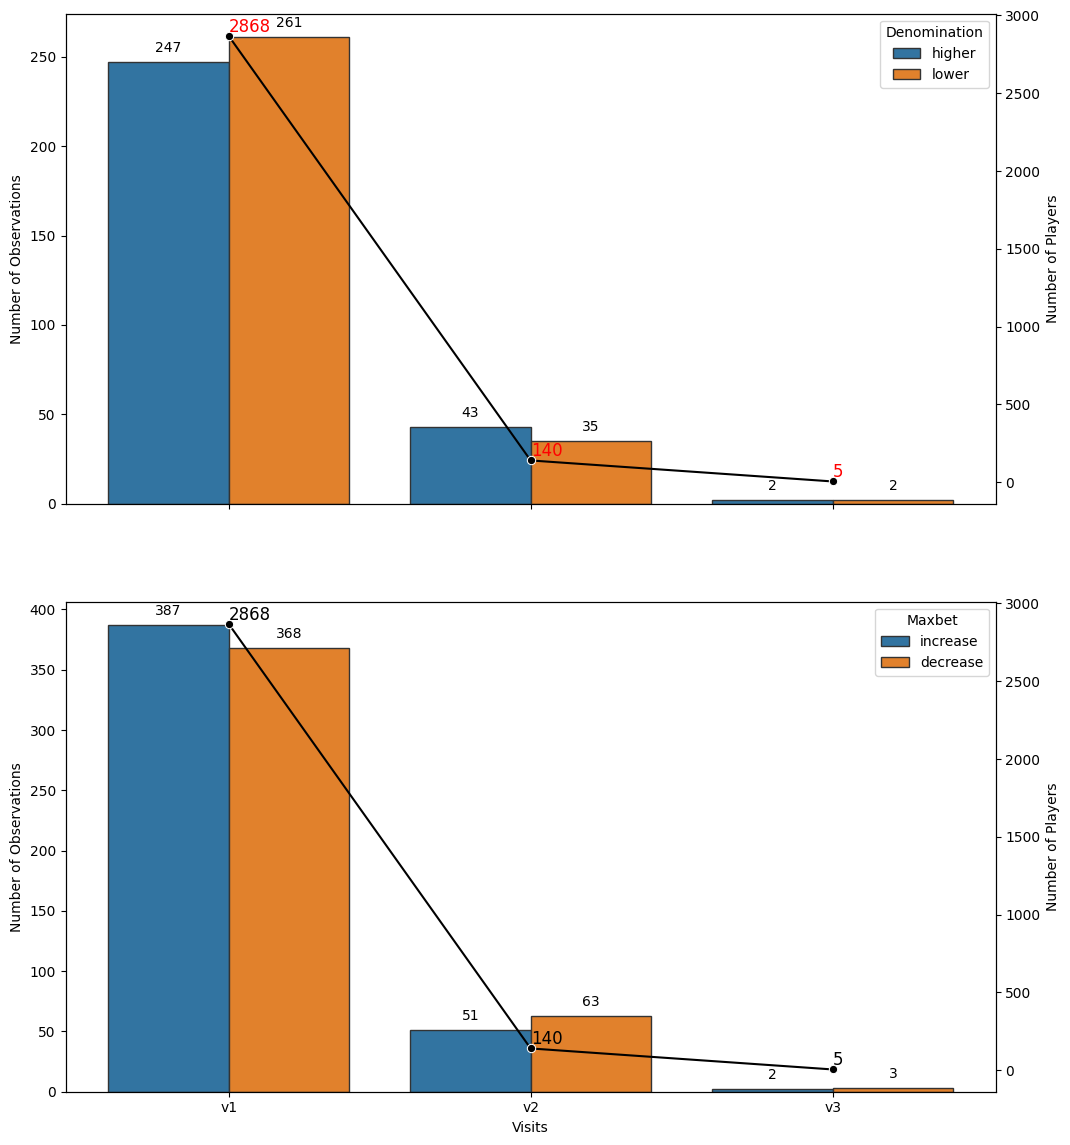

In [26]:
# Create figure 12
fig12, axes12 = plt.subplots(2, 1, sharex=True)
sns.countplot(x='visit_c', data=df_bottom_20, hue='denom_type', hue_order=['higher', 'lower'], edgecolor=".2", ax=axes12[0])
# Create second y-axis
axes12_2 = axes12[0].twinx()

# Create a line plot with the count dictionary
sns.lineplot(x=list(count_v_bottom.keys()), y=list(count_v_bottom.values()), marker='o', ax=axes12_2, color='black')
# Add the number of observations per leg as a text to the plot 
for i in range(len(count_v_bottom)):
    axes12_2.text(i, list(count_v_bottom.values())[i], list(count_v_bottom.values())[i], ha='left', va='bottom', fontsize=12, color='red')

# Display whole values (no decimals) on center top of bars
for p in axes12[0].patches:
    axes12[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# Set the y-axis labels
axes12[0].set_ylabel('Number of Observations')
axes12_2.set_ylabel('Number of Players')
axes12[0].set_xlabel(None)

# Set legnd titles
axes12[0].legend_.set_title('Denomination')

sns.countplot(x='visit_c', data=df_bottom_20, hue='maxbet_type', hue_order=['increase', 'decrease'], edgecolor=".2", ax=axes12[1])
# Create second y-axis
axes12_3 = axes12[1].twinx()
# Set the x-axis labels
axes12[1].set_xlabel('Visits')


# Create a line plot with the count dictionary
sns.lineplot(x=list(count_v_bottom.keys()), y=list(count_v_bottom.values()), marker='o', ax=axes12_3, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_v_bottom)):
    axes12_3.text(i, list(count_v_bottom.values())[i], list(count_v_bottom.values())[i], ha='left', va='bottom', fontsize=12)

# Display whole values (no decimals) on center top of bars
for p in axes12[1].patches:
    axes12[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes12[1].set_ylabel('Number of Observations')
axes12_3.set_ylabel('Number of Players')

# Set legnd titles
axes12[1].legend_.set_title('Maxbet')

# Make figure bigger   ;
fig12.set_size_inches(12, 14)
# Make figure more opaque
fig12.set_alpha(0.8)

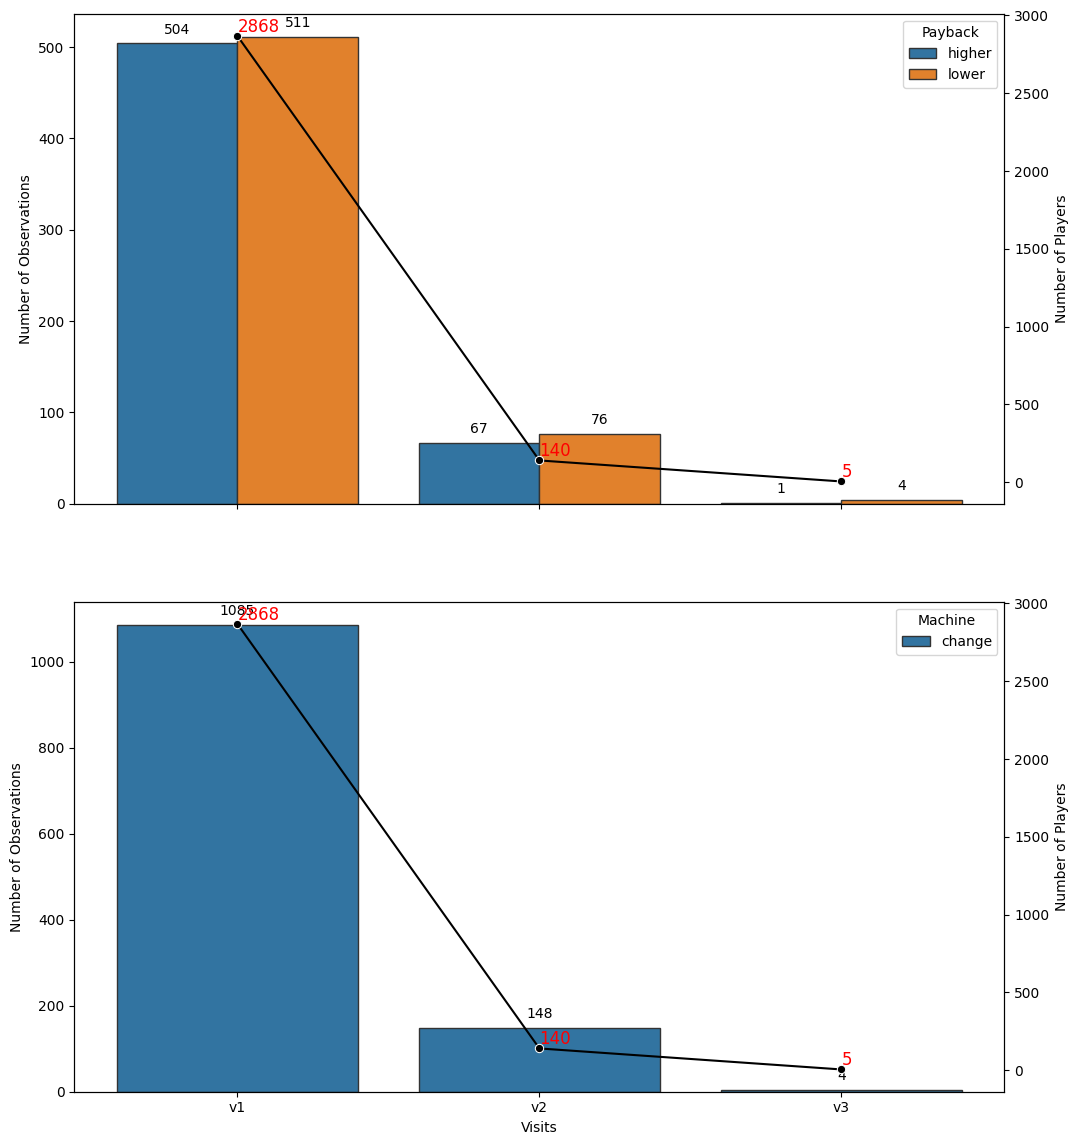

In [27]:
# Create figure 13
fig13, axes13 = plt.subplots(2, 1, sharex=True)
sns.countplot(x='visit_c', data=df_bottom_20, hue='payback_type', hue_order=['higher', 'lower'], edgecolor=".2", ax=axes13[0])
# Create second y-axis
axes13_2 = axes13[0].twinx()

# Create a line plot with the count dictionary
sns.lineplot(x=list(count_v_bottom.keys()), y=list(count_v_bottom.values()), marker='o', ax=axes13_2, color='black')
# Add the number of observations per leg as a text to the plot 
for i in range(len(count_v_bottom)):
    axes13_2.text(i, list(count_v_bottom.values())[i], list(count_v_bottom.values())[i], ha='left', va='bottom', fontsize=12, color='red')

# Display whole values (no decimals) on center top of bars
for p in axes13[0].patches:
    axes13[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# Set the y-axis labels
axes13[0].set_ylabel('Number of Observations')
axes13_2.set_ylabel('Number of Players')
axes13[0].set_xlabel(None)

# Set legnd titles
axes13[0].legend_.set_title('Payback')

sns.countplot(x='visit_c', data=df_bottom_20, hue='machine_type', hue_order=['change'], edgecolor=".2", ax=axes13[1])
# Create second y-axis
axes13_3 = axes13[1].twinx()
# Set the x-axis labels
axes13[1].set_xlabel('Visits')


# Create a line plot with the count dictionary
sns.lineplot(x=list(count_v_bottom.keys()), y=list(count_v_bottom.values()), marker='o', ax=axes13_3, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_v_bottom)):
    axes13_3.text(i, list(count_v_bottom.values())[i], list(count_v_bottom.values())[i], ha='left', va='bottom', fontsize=12, color='red')

# Display whole values (no decimals) on center top of bars
for p in axes13[1].patches:
    axes13[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes13[1].set_ylabel('Number of Observations')
axes13_3.set_ylabel('Number of Players')

# Set legnd titles
axes13[1].legend_.set_title('Machine')

# Make figure bigger   ;
fig13.set_size_inches(12, 14)
# Make figure more opaque
fig13.set_alpha(0.8)

#### Per Session

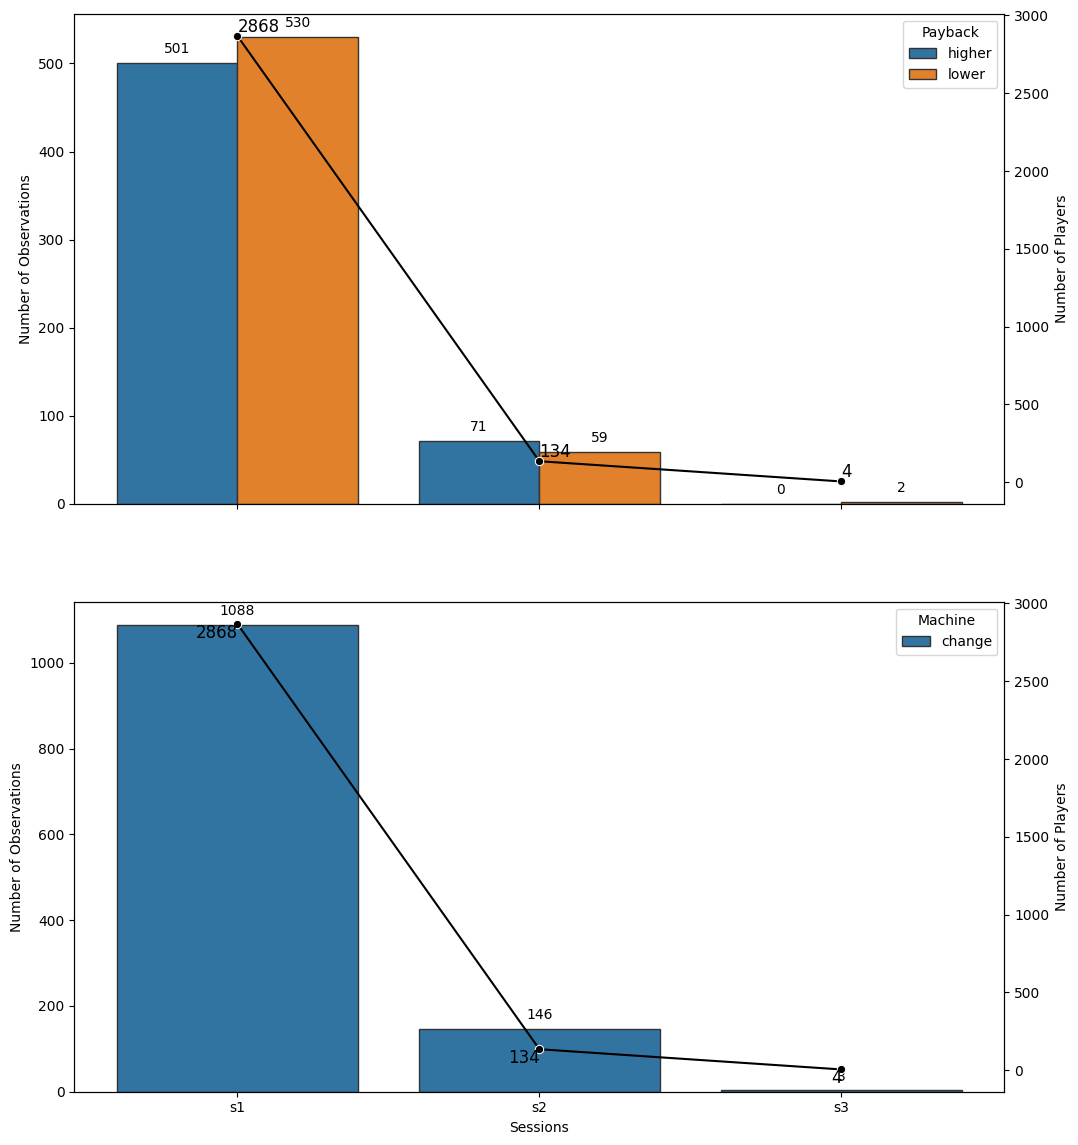

In [28]:
# Creare figure 14 that is the same as figure 12 but replacing 'visit_c' with 'session_c'
fig14, axes14 = plt.subplots(2, 1, sharex=True)
sns.countplot(x='session_c', data=df_bottom_20, hue='payback_type', hue_order=['higher', 'lower'], edgecolor=".2", ax=axes14[0])
# Create second y-axis
axes14_2 = axes14[0].twinx()

# Create a line plot with the count dictionary
sns.lineplot(x=list(count_s_bottom.keys()), y=list(count_s_bottom.values()), marker='o', ax=axes14_2, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_s_bottom)):
    axes14_2.text(i, list(count_s_bottom.values())[i], list(count_s_bottom.values())[i], ha='left', va='bottom', fontsize=12)

# Display whole values (no decimals) on center top of bars
for p in axes14[0].patches:
    axes14[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes14[0].set_ylabel('Number of Observations')
axes14_2.set_ylabel('Number of Players')
axes14[0].set_xlabel(None)

# Set legnd titles
axes14[0].legend_.set_title('Payback')

sns.countplot(x='session_c', data=df_bottom_20, hue='machine_type', hue_order=['change'], edgecolor=".2", ax=axes14[1])
# Create second y-axis
axes14_3 = axes14[1].twinx()
# Set the x-axis labels
axes14[1].set_xlabel('Sessions')


# Create a line plot with the count dictionary
sns.lineplot(x=list(count_s_bottom.keys()), y=list(count_s_bottom.values()), marker='o', ax=axes14_3, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_s_bottom)):
    axes14_3.text(i, list(count_s_bottom.values())[i], list(count_s_bottom.values())[i], ha='right', va='top', fontsize=12)

# Display whole values (no decimals) on center top of bars
for p in axes14[1].patches:
    axes14[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes14[1].set_ylabel('Number of Observations')
axes14_3.set_ylabel('Number of Players')

# Set legnd titles
axes14[1].legend_.set_title('Machine')

# Make figure bigger
fig14.set_size_inches(12, 14)
# Make figure more opaque
fig14.set_alpha(0.8)

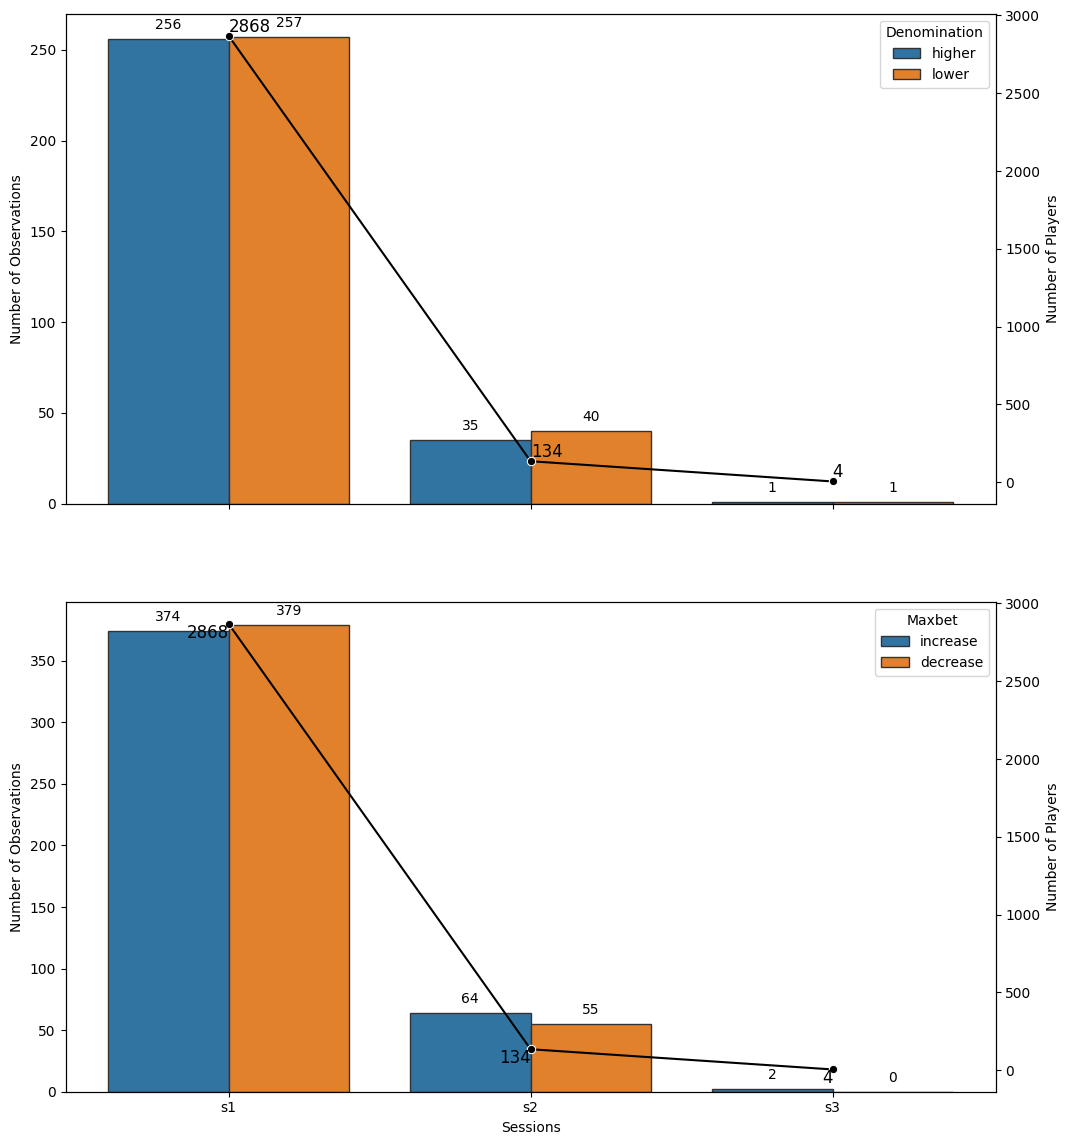

In [29]:
# Create figure 15 that is the same as figure 13 but replacing 'visit_c' with 'session_c'
fig15, axes15 = plt.subplots(2, 1, sharex=True)
sns.countplot(x='session_c', data=df_bottom_20, hue='denom_type', hue_order=['higher', 'lower'], edgecolor=".2", ax=axes15[0])
# Create second y-axis
axes15_2 = axes15[0].twinx()

# Create a line plot with the count dictionary
sns.lineplot(x=list(count_s_bottom.keys()), y=list(count_s_bottom.values()), marker='o', ax=axes15_2, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_s_bottom)):
    axes15_2.text(i, list(count_s_bottom.values())[i], list(count_s_bottom.values())[i], ha='left', va='bottom', fontsize=12)

# Display whole values (no decimals) on center top of bars
for p in axes15[0].patches:
    axes15[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes15[0].set_ylabel('Number of Observations')
axes15_2.set_ylabel('Number of Players')
axes15[0].set_xlabel(None)

# Set legnd titles
axes15[0].legend_.set_title('Denomination')

sns.countplot(x='session_c', data=df_bottom_20, hue='maxbet_type', hue_order=['increase', 'decrease'], edgecolor=".2", ax=axes15[1])
# Create second y-axis
axes15_3 = axes15[1].twinx()
# Set the x-axis labels
axes15[1].set_xlabel('Sessions')


# Create a line plot with the count dictionary
sns.lineplot(x=list(count_s_bottom.keys()), y=list(count_s_bottom.values()), marker='o', ax=axes15_3, color='black')
# Add the number of observations per leg as a text to the plot
for i in range(len(count_s_bottom)):
    axes15_3.text(i, list(count_s_bottom.values())[i], list(count_s_bottom.values())[i], ha='right', va='top', fontsize=12)

# Display whole values (no decimals) on center top of bars
for p in axes15[1].patches:
    axes15[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the y-axis labels
axes15[1].set_ylabel('Number of Observations')
axes15_3.set_ylabel('Number of Players')

# Set legnd titles
axes15[1].legend_.set_title('Maxbet')

# Make figure bigger
fig15.set_size_inches(12, 14)
# Make figure more opaque
fig15.set_alpha(0.8)



## Distribution Plots

### Top 20 vs Bottom 20
#### General

Mean (%) return of W for top: inf
Mean (%) return of W for bottom: 411.15
Mean (%) return of NH for top: -62.16
Mean (%) return of NH for bottom: -67.32


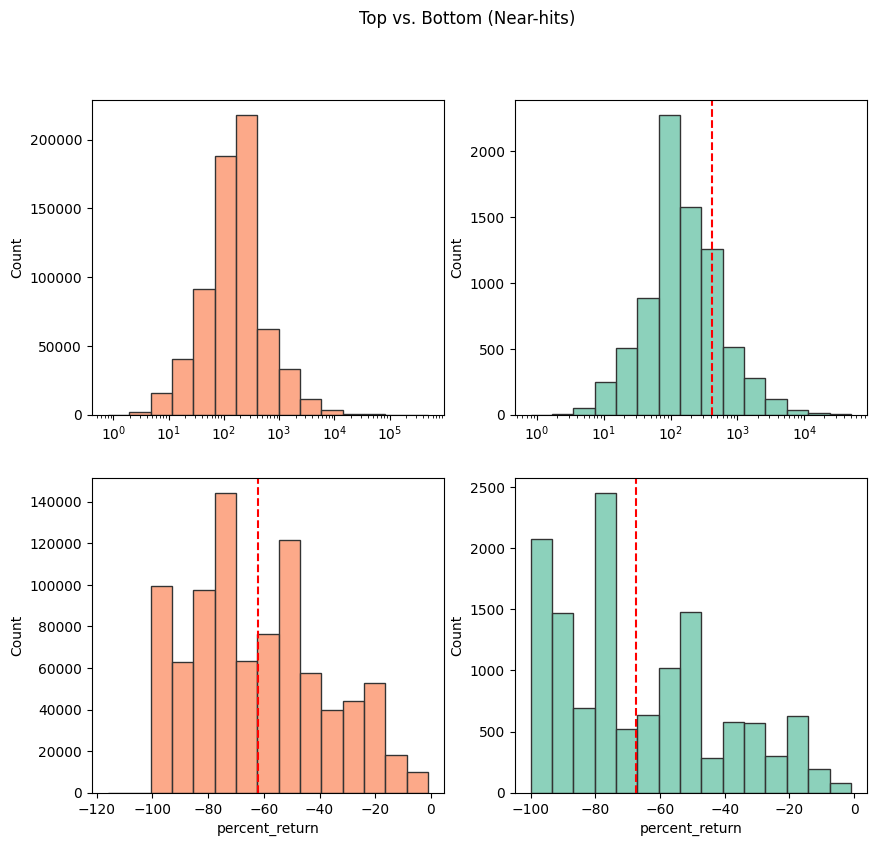

In [30]:
# mean of near hits top
mean_NH_top = round(df_top_20[df_top_20['result_type'] == 'near-hit']['percent_return'].mean(), 2)

# Mean of near-hits bottom
mean_NH_bottom = round(df_bottom_20[df_bottom_20['result_type'] == 'near-hit']['percent_return'].mean(), 2)

# mean of gains top
mean_W_top = round(df_top_20[df_top_20['result_type'] == 'gain']['percent_return'].mean(), 2)

# Mean of gains bottom
mean_W_bottom = round(df_bottom_20[df_bottom_20['result_type'] == 'gain']['percent_return'].mean(), 2)


# Mean of percent return for gains
print("Mean (%) return of W for top:", mean_W_top)

# Mean of percent return for near hits
print("Mean (%) return of W for bottom:", mean_W_bottom)

# Mean of percent return for gains
print("Mean (%) return of NH for top:", mean_NH_top)

# Mean of percent return for near hits
print("Mean (%) return of NH for bottom:", mean_NH_bottom)

# Create figure 16
fig16, axes16 = plt.subplots(2, 2)

#-----------------Top----------------------------# 
# Add a histogram on axes3[0,1]
sns.histplot(df_top_20[df_top_20['result_type'] == 'gain']['percent_return'], ax=axes16[0,0], bins=15, edgecolor=".2", color='#fc8d62', log_scale=True)

axes16[0,0].axvline(mean_W_top, color='r', linestyle='--')
axes16[0,0].set(xlabel=None)


# Add a histogram on axes3[0,1]
sns.histplot(df_top_20[df_top_20['result_type'] == 'near-hit']['percent_return'], ax=axes16[1,0], bins=15, edgecolor=".2", color='#fc8d62')
# add a vertical line at the mean
axes16[1,0].axvline(mean_NH_top, color='r', linestyle='--')

#-----------------Bottom----------------------------# 
# Add a histogram on axes3[1]
sns.histplot(df_bottom_20[df_bottom_20['result_type'] == 'gain']['percent_return'], ax=axes16[0,1], bins=15, edgecolor=".2", color='#66c2a5', log_scale=True)
# add a vertical line at the mean
axes16[0,1].axvline(mean_W_bottom, color='r', linestyle='--')
# Remove Label
axes16[0,1].set(xlabel=None)


# Add a histogram on axes3[1]
sns.histplot(df_bottom_20[df_bottom_20['result_type'] == 'near-hit']['percent_return'], ax=axes16[1,1], bins=15, edgecolor=".2", color='#66c2a5')
# add a vertical line at the mean
axes16[1,1].axvline(mean_NH_bottom, color='r', linestyle='--')
# Set figure title
fig16.suptitle('Top vs. Bottom (Near-hits)', fontsize=12)
# Make figure bigger
fig16.set_size_inches(10, 9)

#### Per Session 1

Mean (%) return of W for top S1: inf
Mean (%) return of W for bottom S1: 413.35
Mean (%) return of NH for top S1: -62.31
Mean (%) return of NH for bottom S1: -67.31


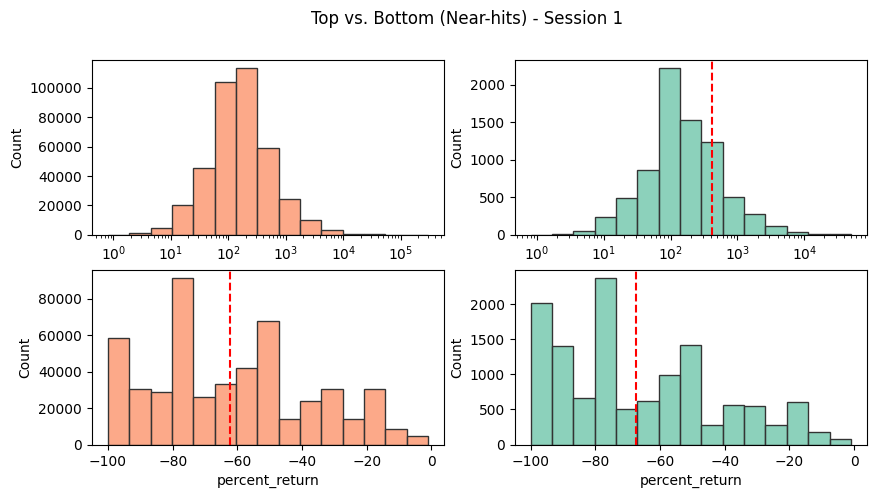

In [31]:
# Slip data in Session 1 Data for top and bottom
s1_data_bottom = df_bottom_20[df_bottom_20['session_c'] == 's1']
s1_data_top = df_top_20[df_top_20['session_c'] == 's1']

# Calculate mean of percent return for gains
mean_W_top_S1 = round(s1_data_top[s1_data_top['result_type'] == 'gain']['percent_return'].mean(), 2)
mean_W_bottom_S1 = round(s1_data_bottom[s1_data_bottom['result_type'] == 'gain']['percent_return'].mean(), 2)
mean_NH_top_S1 = round(s1_data_top[s1_data_top['result_type'] == 'near-hit']['percent_return'].mean(), 2)
mean_NH_bottom_S1 = round(s1_data_bottom[s1_data_bottom['result_type'] == 'near-hit']['percent_return'].mean(), 2)

# Mean of percent return for gains
print("Mean (%) return of W for top S1:", mean_W_top_S1)
print("Mean (%) return of W for bottom S1:", mean_W_bottom_S1)
print("Mean (%) return of NH for top S1:", mean_NH_top_S1)
print("Mean (%) return of NH for bottom S1:", mean_NH_bottom_S1)



# Create figure 17
fig17, axes17 = plt.subplots(2, 2)

#-----------------Top----------------------------#
# Add a histogram on axes17[0,0]
sns.histplot(s1_data_top[s1_data_top['result_type'] == 'gain']['percent_return'], ax=axes17[0, 0], bins=15, edgecolor=".2", color='#fc8d62', log_scale=True)
# add a vertical line at the mean
axes17[0, 0].axvline(mean_W_top_S1, color='r', linestyle='--')

# Add a histogram on axes17[1,0]
sns.histplot(s1_data_top[s1_data_top['result_type'] == 'near-hit']['percent_return'], ax=axes17[1, 0], bins=15, edgecolor=".2", color='#fc8d62')
# add a vertical line at the mean
axes17[1, 0].axvline(mean_NH_top_S1, color='r', linestyle='--')

#-----------------Bottom----------------------------#
# Add a histogram on axes17[0,1]
sns.histplot(s1_data_bottom[s1_data_bottom['result_type'] == 'gain']['percent_return'], ax=axes17[0, 1], bins=15, edgecolor=".2", color='#66c2a5', log_scale=True)
# add a vertical line at the mean
axes17[0, 1].axvline(mean_W_bottom_S1, color='r', linestyle='--')

# Add a histogram on axes17[1,1]
sns.histplot(s1_data_bottom[s1_data_bottom['result_type'] == 'near-hit']['percent_return'], ax=axes17[1, 1], bins=15, edgecolor=".2", color='#66c2a5')
# add a vertical line at the mean
axes17[1, 1].axvline(mean_NH_bottom_S1, color='r', linestyle='--')

# Set figure title
fig17.suptitle('Top vs. Bottom (Near-hits) - Session 1', fontsize=12)
# make figure bigger
fig17.set_size_inches(10, 5)

<Axes: xlabel='percent_return', ylabel='Density'>

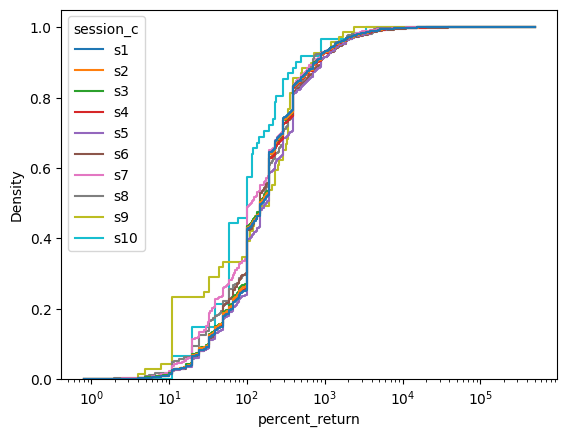

In [32]:

# sns.boxplot(data=df_top_20[df_top_20['session_c'] == 's1'], y='player_loss', x='result_type', hue='gender', hue_order=['M', 'F'])




sns.histplot(df_top_20[df_top_20['result_type'] == 'gain'], x ='percent_return', log_scale=True, hue="session_c", cumulative=True,
             stat="density", common_norm=False, fill=False, element="step")




<Axes: xlabel='percent_return', ylabel='Density'>

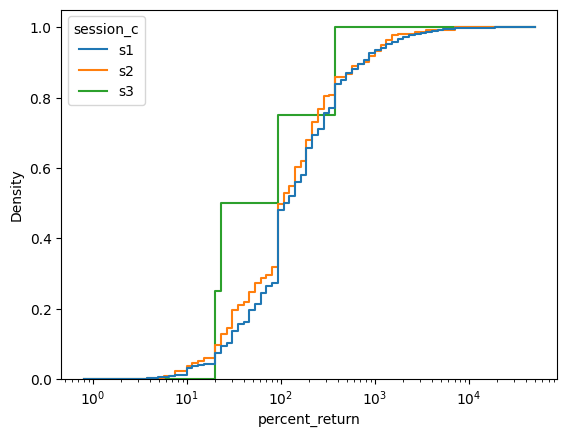

In [33]:
sns.histplot(df_bottom_20[df_bottom_20['result_type'] == 'gain'], x ='percent_return', log_scale=True, hue="session_c", cumulative=True,
             stat="density", common_norm=False, fill=False, element="step")

<Axes: >

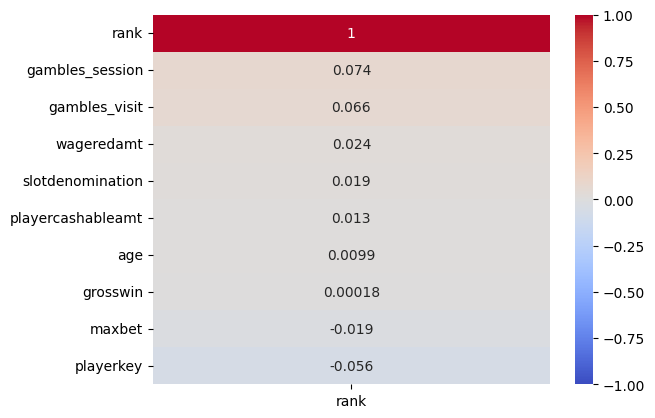

In [34]:
# Create dataframe for top 20% of players with the following columns: player_id, session_c, result_type, percent_return
matrix_top_20 = df_top_20[['playerkey', 'playercashableamt', 'wageredamt', 'maxbet', 'grosswin', 'age', 'rank', 'slotdenomination', 'gambles_visit', 'gambles_session']]

# Rank Correlation
rank_corr = matrix_top_20.corr(numeric_only=True)[['rank']].sort_values(by='rank', ascending=False)
rank_corr

sns.heatmap(rank_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

#### Per Vist